# 基于树的方法

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/E0ur0Kqp/classificationtree_example.png?v=060d3f5064fac68f3d223f865fad723e" width = 70% height = 70% />

<br>

点击[此处](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)查看案例

基于树的方法根据分层（stratifying）和分割（segmenting）的方式将预测变量空间划分为一系列简单区域。对某个给定待观测的观测值，用它所属区域中训练集的平均值或众数对其进行预测。由于划分预测变量空间的分裂规则可以被概括为一棵树，所以此类方法被称为**决策树(decition tree)**方法。

## 决策树基本原理

### 回归树

**案例：用回归树预测棒球运动员薪水**

使用Hitters数据集，根据变量Years和Hits预测棒球运动员的Salary。

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/nOun05RP/p01.jpg?v=27d264a968a6909c14dcfeeb68fe23a8" width = 40% height = 40% />

<br>

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/4guJgPKZ/p02.jpg?v=acc3a0bc9ad5b2d1d5c8f293d11219e1" width = 40% height = 40% />

<br> 

与自然界中的树类似，区域$R_{1}$、$R_{2}$和$R_{3}$称为树的终端节点（terminal node）或树叶（leaf）。沿着树将预测变量空间分开的点称为内部节点（internal node）。树内部各个节点的连接部分称为分支（branch）。

<img src="https://bradleyboehmke.github.io/HOML/images/decision-tree-terminology.png" width = 70% height = 70% />

#### 通过特征空间分层预测

建立回归树的过程大致可以分为两步。

- 将预测变量空间（即$X_{1}, X_{2}, \ldots, X_{p}$的可能取值构成的集合）分割成$J$个互不重叠的区域$R_{1}, R_{2}, \ldots, R_{J}$。
- 对落入区域$R_{J}$的每个观测值作同样的预测，预测值等于$R_{J}$上训练集的响应值的简单算术平均。

<br>

> 问题：如何构建区域$R_{1}, R_{2}, \ldots, R_{J}$？

预测变量空间划分为高维矩形，或称盒子。划分区域的目标是找到使模型的残差平方和$RSS$最小的矩形区域$R_{1}, R_{2}, \ldots, R_{J}$。$RSS$的定义为

$$
\sum_{j=1}^{J} \sum_{i \in R_{j}}\left(y_{i}-\hat{y}_{R_{j}}\right)^{2}
$$

上式中的$\hat{y}_{R_{j}}$是第$j$个矩形区域中训练集的平均响应值。遗憾的是，要想考虑将特征空间所有的划分可能性，在计算上是不可行的。因此一般采用自上而下（top-down）、贪婪（greedy）方法：递归二叉分裂（recursive binary splitting）。

在执行递归二叉分裂时，先选择预测变量$X_{j}$和分割点$s$，将预测变量空间分为两个区域$\left\{X \mid X_{j}<s\right\}$和$\left\{X \mid X_{j} \geq s\right\}$，使$RSS$尽可能地减少。更正式的，对$j$和$s$，定义一对半平面：

$$
R_{1}(j, s)=\left\{X \mid X_{j}<s\right\} \text { and } R_{2}(j, s)=\left\{X \mid X_{j} \geq s\right\}
$$

寻找$j$和$s$，使得下式取得最小值

$$
\sum_{i: x_{i} \in R_{1}(j, s)}\left(y_{i}-\hat{y}_{R_{1}}\right)^{2}+\sum_{i: x_{i} \in R_{2}(j, s)}\left(y_{i}-\hat{y}_{R_{2}}\right)^{2}
$$

重复上述步骤，继续寻找分割数据集的最优预测变量和最优分割点，使随之产生的区域中的$RSS$达到最小。这一过程不断持续，直到符合某个停止准则。

毫无疑问，某个变量可以在树划分中出现多次。例如假设数据生成服从如下正态分布，$Y_{i} \sim N\left(\sin \left(X_{i}\right), \sigma^{2}\right)$，一棵简单的回归树可以用下图表示

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/12urX2vy/p01.jpg?v=a6aded999f14f630f482d18d5b434496" width = 80% height = 80% />

或者构建一棵多层的树

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/xQuAB1jJ/p02.jpg?v=1e809d75b629b857c5ec1cb1c167c608" width = 80% height = 80% />

对于机器学习常用的分类数据集iris

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width = 80% height = 80% />

决策树模型可以表示为

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/7Ku8YKWq/p03.jpg?v=b16138f672fb39003b5bbe67686af433" width = 80% height = 80% />

#### 树的剪枝

上述的过程可能会导致树的过拟合。一种可能的解决方法是：仅当分裂使残差平方和$RSS$的减小量超过某阈值时才分裂树结点。这种策略能产生较小的树，但可能产生过于短视的问题。

更好的策略是生成一棵很大的树，然后通过剪枝（prune）得到子树（sub-tree）。直观上看，剪枝的目标是选出使测试集预测误差最小的子树。但对每一棵都用交叉验证来估计误差太过复杂。

#### 代价复杂性剪枝

这种方法不是考虑每一棵可能的子树，而是通过调整参数$\alpha$在子树的复杂性和训练数据的契合度之间进行权衡。

$$
\sum_{m=1}^{|T|} \sum_{i: x_{i} \in R_{m}}\left(y_{i}-\hat{y}_{R_{m}}\right)^{2}+\alpha|T|
$$

这里的$|T|$表述树$T$的终端结点树。

<br>

**算法**

- 利用递归二叉分裂在训练集中生成一棵大树
- 对大树进行代价复杂性剪枝，得到一系列最优子树，子树是$\alpha$的函数
- 利用$K$折交叉验证选择$\alpha$
- 选出选定的$\alpha$值在步骤2中对应的子树即可

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/5zuwzndN/p06.jpg?v=ce5f8fb93d6a2038a218ca602ba287ac" width = 60% height = 60% />

### 分类树

分类树是用于预测定性变量而非定理变量。它同样采用递归二叉分裂，替代$RSS$的指标可以使用分类错误率。

$$
E=1-\max _{k}\left(\hat{p}_{m k}\right)
$$

其中$\hat{p}_{m k}$代表第$m$个区域的训练集中第$k$类所占比例。但实践中，它在构建树时不够敏感，往往使用基尼系数（Gini index）

$$
G=\sum_{k=1}^{K} \hat{p}_{m k}\left(1-\hat{p}_{m k}\right)=1-\sum_{k=1}^{K}\hat{p}_{m k}^{2}
$$

或互熵（cross-entropy）

$$
D=-\sum_{k=1}^{K} \hat{p}_{m k} \log_{2} \hat{p}_{m k}
$$

可见，它们都是结点纯度（purity）的衡量指标，若$\hat{p}_{m k}$取值接近$0$或$1$，它较小，就意味着某个结点包含的观测值几乎都来自于同一类别。

由此带来的信息增益为

$$\operatorname{Gain}(S, A) \equiv \operatorname{D}(S)-\underset{v \in \operatorname{Values}(A)}{\sum} \frac{\left|S_{v}\right|}{|S|} \operatorname{D}\left(S_{v}\right)$$

<br>

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/5zuwznbJ/p07.jpg?v=883a0bf5988b2765c683a85dc0f1a928" width = 50% height = 50% />

**案例**

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/P8uyA6zB/decision_tree04.png?v=0ace6e62d28f86440941ccb44a178712" width = 40% height = 40% />

因此，分类前

$$H(10 / 20,10 / 20)=-10 / 20 \log (10 / 20)-10 / 20 \log (10 / 20)=1$$

每个类的熵

$$H(home) =-6 / 12 \log (6 / 12)-6 / 12 \log (6 / 12)=1$$

$$H(away)=-4 / 8 \log (6 / 8)-4 / 8 \log (4 / 8)=1$$

分类后的熵为

$$12 / 20^{*} \mathrm{H}(\text { home })+8 / 20^{*} \mathrm{H}(\text { away })=1$$

<br>

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/kpuwj4rX/decision_tree05.png?v=655db848409079cbd666b7d06c6cb72bg" width = 40% height = 40% />

每个类的熵

$$H(5pm)=-1 / 4 \log (1 / 4)-3 / 4 \log (3 / 4)$$

$$H(7pm)=-9 / 12 \log (9 / 12)-3 / 12 \log (3 / 12)$$

$$H(9pm)=-0 / 4 \log (0 / 4)-4 / 4 \log (4 / 4)=0$$

分类后的熵为

$$4 / 20^{*} \mathrm{H}(1 / 4,3 / 4)+12 / 20^{*} \mathrm{H}(9 / 12,3 / 12)+4 / 20^{*} \mathrm{H}(0 / 4,4 / 4)=0.65$$

因此信息增益为

$$1-0.65=0.35$$

所以，毫无疑问应该选择后者。每个节点都选择信息增益最大的属性进行叉裂。

<br>

练习

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/GGu2nZQE/p01.jpg?v=c19a74baab00aeda0afac431727c8321" width = 40% height = 40% />

<br>
<br>

### 案例一： 纽约和旧金山的房屋分类



- 导入数据

In [1]:
import pandas as pd

data = pd.read_csv("https://p193.p3.n0.cdn.getcloudapp.com/items/qGulPAPB/data.csv?v=1bfb05ac0de770d0127996d6954141b2")
data

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10
...,...,...,...,...,...,...,...,...
487,1,5.0,2.5,1800000,1890,3073,586,76
488,1,2.0,1.0,695000,1923,1045,665,106
489,1,3.0,2.0,1650000,1922,1483,1113,106
490,1,1.0,1.0,649000,1983,850,764,163


In [2]:
target_name = "in_sf"
feature_names = ["beds", "bath", "price", "year_built", "sqft", "price_per_sqft", "elevation"]

y = data.loc[:, target_name]
X = data.loc[:, feature_names]

- 划分训练和测试数据集

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- 构建决策树

In [24]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=8)
clf = clf.fit(X_train, y_train)

- 决策树图

C:\Users\glenz\AppData\Roaming\Python\Python37\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


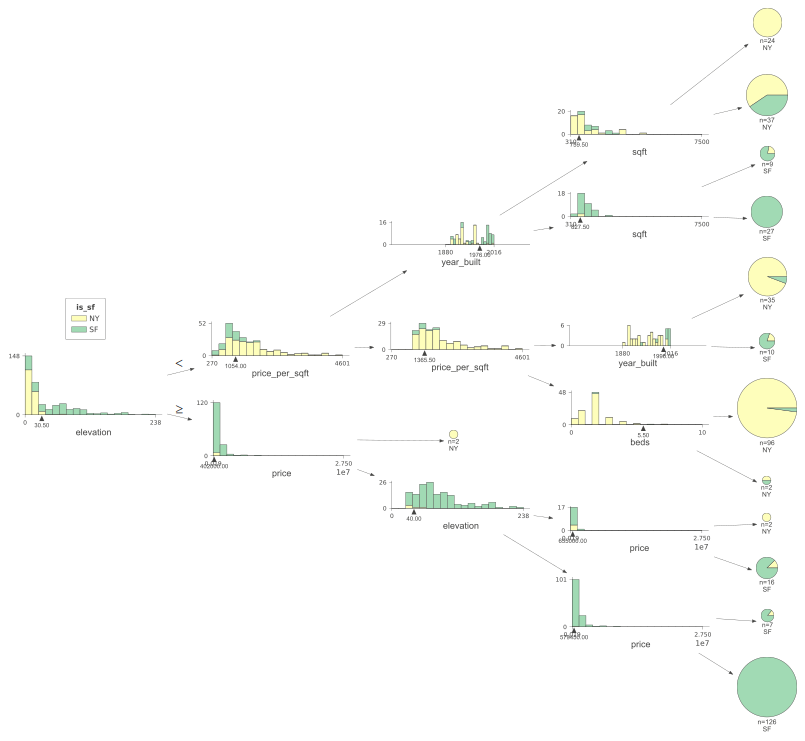

In [5]:
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

viz = dtreeviz(clf,
               X_train,
               y_train,
               target_name='is_sf',  # this name will be displayed at the leaf node
               feature_names=feature_names,
               class_names=["NY", "SF"],
               orientation='LR'
              )
viz

In [6]:
viz.view()

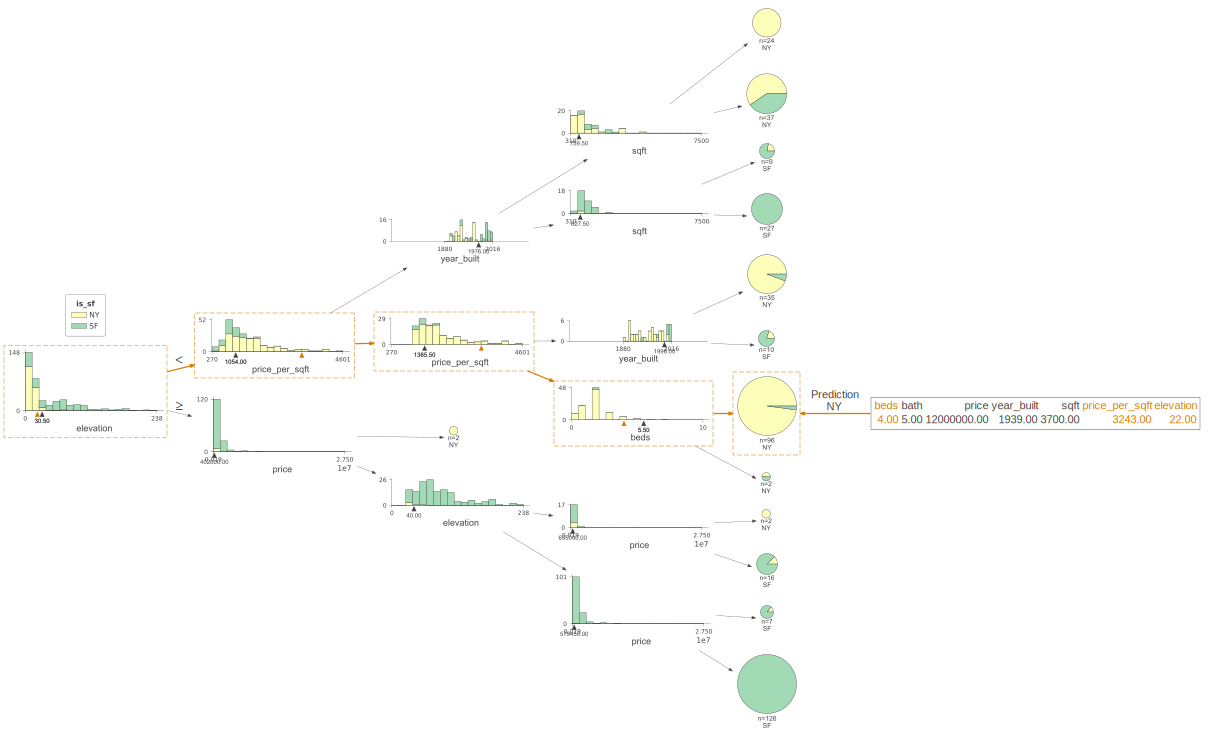

In [7]:
viz = dtreeviz(clf,
               X_train,
               y_train,
               target_name='is_sf',  # this name will be displayed at the leaf node
               feature_names=feature_names,
               class_names=["NY", "SF"],
               orientation='LR',
               X=X_test.iloc[0,:]
              )
viz

In [8]:
viz.view()

In [25]:
clf.score(X_test, y_test)

0.8686868686868687

### 案例二 —— R实现

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/7Ku8Kq95/decision_treedemo.png?v=9816b36c9a052f6db9297f089850db16" width = 60% height = 60% />

<br>

例如

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/d5upK9Lp/p13.jpg?v=6923f8542000e566ced6d79e19a63638" width = 60% height = 60% />

程序

```R
# Example: to tell a person good or bad
# Reference：https://www.guru99.com/r-decision-trees.html

# import library
library(rio)
library(tidyverse)
library(rpart)
library(rpart.plot)

# import data
setwd(getwd())
train_data <- import("https://p193.p3.n0.cdn.getcloudapp.com/items/OAuJA45Y/hero_train.csv?v=4dc0aa63662f32fb0c78646f7fc12bc4")
train_data
```

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/xQuA1zyW/p10.jpg?v=f8368fa1716f5761efbed7d432b01142" width = 30% height = 30% />

```R
# data clean
for (colname in colnames(train_data)){
    train_data[colname] <- factor(train_data[[colname]])
}
train_data
```

```R
cleaned_train_data <- as.data.frame(select(train_data, -name))
fit <- rpart(class~., data = cleaned_train_data, method = "class", control = rpart.control(minsplit=1))
rpart.plot(fit, extra = 106)
```

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/JrugrG06/p12.jpg?v=fa7150f05848db7f9ed1b7fde9ff0e1d" width = 30% height = 30% />

### 树的优缺点

- 解释性强
- 决策树接近人的决策模式
- 可以直接处理定性变量的预测变量
- 一般而言，树的预测准确性一般无法达到其他回归和分类方法的水平

## 装袋法、随机森林和提升法

集成学习

集成学习是一种机器学习范式。在集成学习中，我们会训练多个模型（通常称为「弱学习器」）解决相同的问题，并将它们结合起来以获得更好的结果。最重要的假设是：当弱模型被正确组合时，我们可以得到更精确和/或更稳健的模型。

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/rRu0pvvK/p01.jpg?v=1770e4c702e5bc5d61164a70065fa28f" width = 45% height = 45% />

<br>

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/NQuKLzqr/1_8T4HEjzHto_V8PrEFLkd9A.png?v=bc84d86095cd7129266db8a3f09965b4" width = 50% height = 50% />

### 装袋法

装袋法的基本思想来自于“群体智慧（wisdom of the crowd）”效应，是减小统计学习方法方差的常用做法，也称为自助法聚集（bootstrap aggregation）。

给定$n$个独立观测值$Z_{1}, \ldots, Z_{n}$，观测值的方差都是$\sigma^{2}$，它们的平均值$\bar{Z}$的方差为$\sigma^{2} / n$，即均值可以减小方差。因此，自然的一个想法就是从总体中抽取多个训练集，对每个训练集分别建立预测模型，再对得到的预测值求均值。换而言之，可以用$B$个独立训练集计算出$\hat{f}^{1}(x), \hat{f}^{2}(x), \ldots, \hat{f}^{B}(x)$，对它们求平均，得到

$$
\hat{f}_{\mathrm{avg}}(x)=\frac{1}{B} \sum_{b=1}^{B} \hat{f}^{b}(x)
$$

毫无疑问，上述方法在一般情况下不可行，但可以使用自助法替代，即从某个单一的训练集中重复取样，得到

$$
\hat{f}_{\mathrm{bag}}(x)=\frac{1}{B} \sum_{b=1}^{B} \hat{f}^{* b}(x)
$$

这就是装袋法。它可以改善多种回归模型的预测效果，它对决策树尤其有用。事实证明，通过成百甚至上千棵树的组合，装袋法能大幅提升预测准确性。

<br>

**袋外误差估计**

对于一棵特定的树，在自助法中，约三分之一没有使用的观测值称为此树的袋外（out-of-bag，OOB）观测值。用它们进行预测，每个预测通过求平均（回归情况）或执行多数投票（分类情况），得到其OOB预测，从而得对装袋法模型测试误差的有效估计。

<br>

**变量重要性度量**

装袋法通常能提高预测的准确性，但由此得到的模型可能难以解释。

但我们可以用RSS或基尼系数对各预测变量的重要性做出整体概括，即通过记录任一给定预测变量引发的分裂而减少的RSS总量或基尼系数减少总量，衡量预测变量的重要性。

<img src="https://bradleyboehmke.github.io/HOML/08-bagging_files/figure-html/n-bags-plot-1.png" width = 60% height = 60% />

### 随机森林

树是高方差函数估计器，它越稠密，方差就越大。早期的分裂决定了树的结构。此外，稠密的树木将训练数据局部化到目标点周围相对较小的区域，这表明它具有低偏差。随机森林的想法是种植许多茂密的树，并通过均值来减弱高方差。为了从平均中收益，各棵树不应该太相关，所以要在构建中注入随机性。

随机森林与装袋法类似，需要对自主抽样训练集建立一系列决策树。不过，在建立这些决策树时，每考虑树上的一个分裂点，都要从全部的$p$个预测变量中选出一个包含$m$个预测变量的随机样本作为候选变量。在每个分裂点处都重新进行抽样，选出$m$个预测变量，通常$m \approx \sqrt{p}$。

为什么这么做呢？假设数据集中有一个很强的预测变量和其他一些中等强度的预测变量，那么在装袋法树的集合中，大多（甚至可能所有）树都会将最强的预测变量用于顶部分裂点，这会导致所有的装袋法树看起来都很相似，因为它们的预测变量是高度相关的，因此平均化所带来的方差减少程度很小。随机森林通过强迫每个分裂点仅考虑预测变量的一个子集，客服了这一困难。这一过程可以被认为是对树去相关化，由此得到的树的平均值有更小的方差，因而树的可信度也更高。

比较装袋法与随机森林

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/Z4uyWOJm/p04.jpg?v=57ec51a8006b557413768a6104e21637" width = 50% height = 50% />

<br>

查看案例，点击[此处](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)

### 提升法（Boosting）

提升法是机器学习中最强有力的学习方法之一，它可以应用于分类问题，也适用于回归方法。它的基本思想是通过组合多个“弱”分类器从而得到一个强分类器。

> 弱分类器就是指错误率略高于随机猜测的分类器。原型弱分类器是决策树。

它是通过对训练点进行重新采样来实现的（对那些被错误分类的样本点给予更多的权重），以产生一个新的分类器，该分类器可以提高以前有问题的特征空间的性能。重复这个过程，产生一个分类器流，最终通过投票来组合最终的分类器。

#### AdaBoost（自适应提升法）

它的自适应在于：前一个基本分类器分错的样本会给于更高的权重，从而重新赋予权重的样本再次用来训练下一个基本分类器，直到达到某个足够小的错误率或者预先指定的最大迭代次数。

考虑二分类问题，因变量$Y \in\{-1,1\}$，考虑一组自变量$X$，一个分类器$G(X)$，训练集的错误率为

$$
\overline{\mathrm{err}}=\frac{1}{N} \sum_{i=1}^{N} I\left(y_{i} \neq G\left(x_{i}\right)\right)
$$

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/8Lun2dOn/p02.jpg?v=72672b4dac4eb1f15a7daeb4b34d106e" width = 40% height = 40% />

**AdaBoost算法**

- 初始化观测值的权重$w_{i}=1 / N, i=1,2, \ldots, N$

- 从$m=1$到$M$

    - 利用权重$w_{i}$，基于训练集拟合分类器$G_{m}(x)$
    
    - 计算$\operatorname{err}_{m}=\frac{\sum_{i=1}^{N} w_{i} I\left(y_{i} \neq G_{m}\left(x_{i}\right)\right)}{\sum_{i=1}^{N} w_{i}}$
    
    - 计算$\alpha_{m}=\frac{1}{2} \log \left(\left(1-\operatorname{err}_{m}\right) / \operatorname{err}_{m}\right)$
    
    - 设置新权重为$w_{i} \cdot \exp \left[\alpha_{m} \cdot I\left(y_{i} \neq G_{m}\left(x_{i}\right)\right)\right], i=1,2, \ldots, N$
    
- 得到分类器结果$G(x)=\operatorname{sign}\left[\sum_{m=1}^{M} \alpha_{m} G_{m}(x)\right]$

https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/adaboost.py

#### 梯度提升法（Gradient Boosting）

提升法是一种舒缓的训练模型方法。

<br>

它的基本算法如下

- 对训练集中的所有的$i$，令$\hat{f}(x)=0$，$r_{i}=y_{i}$

- 对$b=1,2, \ldots, B$重复以下过程

    - 对训练数据$(X, r)$建立一棵有$d$个分裂点（$d+1$个终端节点）的树$\hat{f}^{b}$
    
    - 将压缩后的新树加入模型以更新$\hat{f}$
    
    $$
    \hat{f}(x) \leftarrow \hat{f}(x)+\lambda \hat{f}^{b}(x)
    $$
    
    - 更新残差
    
    $$
    r_{i} \leftarrow r_{i}-\lambda \hat{f}^{b}\left(x_{i}\right)
    $$
    
- 输出经过提升的模型

$$
\hat{f}(x)=\sum_{b=1}^{B} \lambda \hat{f}^{b}(x)
$$

提升方法有三个调整参数

- 树的总数$B$，如果其值过大，它可能出现过拟合

- 压缩参数$\lambda$，它控制着提升法的学习速度，一般而言，学习舒缓的统计学习方法往往有较好的预测效果

- 每棵树的分裂点数$d$，它控制着整个提升模型的复杂性